# Model Comparison
Scikit Learn Models:
- Logistic Regression
- Support Vector Machines
  - Linear and Non-Linear
- Naive Bayes
- Random Forest <br>
- KNN

## Setup and Library Imports

In [86]:
import sys
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [88]:
# Import Logistic Regression class from models/LR.py
sys.path.insert(0, 'models')
from LR import ScratchLogisticRegression

In [89]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [90]:
# Display entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [91]:
features = pd.read_csv('data/processed/features_encoded.csv', index_col=0)
features.head()

,danceability,instrumentalness,total_words,mode,key_6,key_9,key_10,key_11,class
0,0.384,0.000000,0.218094,1.0,0.0,0.0,0.0,0.0,0.0
1,0.338,0.000251,0.360258,1.0,0.0,1.0,0.0,0.0,0.0
2,0.374,0.000003,0.159935,1.0,0.0,0.0,0.0,1.0,0.0
3,0.430,0.000000,0.295638,1.0,0.0,1.0,0.0,0.0,0.0
4,0.291,0.000000,0.174475,1.0,0.0,0.0,0.0,0.0,0.0


### Split Data

In [92]:
y = features.pop('class')

In [93]:
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=0)
y_test[:5]

45    0.0
60    0.0
7     0.0
51    0.0
66    0.0
Name: class, dtype: float64

### Create Search Spaces
Each model type requires its own search space

In [94]:
estimators = [LogisticRegression(), SVC(), LinearSVC(), GaussianNB(),
			RandomForestClassifier(), KNeighborsClassifier()]

In [95]:
lr_space = {}
lr_space['random_state'] = [0]
lr_space['max_iter'] = [50000]
lr_space['penalty'] = ["l1","l2"]
lr_space['C'] = np.logspace(-3,3,7)
lr_space['solver'] = ['liblinear', 'saga']

In [96]:
svm_space = {}
svm_space['random_state'] = [0]
svm_space['max_iter'] = [20000]
svm_space['C'] = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]
svm_space['gamma']: [1,0.1,0.01,0.001]
svm_space['kernel']: ['rbf', 'poly', 'sigmoid']

In [97]:
nb_space = {'var_smoothing': np.logspace(0,-9, num=100)}

In [98]:
rfc_space = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'random_state': [0]
}

In [99]:
knn_space = {'n_neighbors': range(3, 19, 2),
 'weights': ['uniform', 'distance'],
 'metric': ['euclidean', 'manhattan']
}

In [100]:
spaces = {
	'LogisticRegression()': lr_space,
	'SVC()': svm_space, 'LinearSVC()': svm_space,
	'GaussianNB()': nb_space,
	'RandomForestClassifier()': rfc_space,
	'KNeighborsClassifier()': knn_space
}

### Perform Grid Search
Skip this section when trying to run the notebook quickly; takes a while

In [101]:
scores, params = [], []

In [102]:
for model in estimators:
	name = str(model)
	search = GridSearchCV(model, spaces[name], scoring='f1',
						  error_score='raise', cv=3, n_jobs=-1).fit(X_train, y_train)
	scores.append(search.best_score_)
	params.append(str(search.best_params_))
	print(f'Finished searching {name}')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Finished searching LogisticRegression()
Finished searching SVC()
Finished searching LinearSVC()
Finished searching GaussianNB()
Finished searching RandomForestClassifier()
Finished searching KNeighborsClassifier()


### GridSearch Results

In [103]:
search_results = DataFrame({'model': estimators, 'F1': scores, 'params': params})

In [104]:
search_results

,model,F1,params
0,LogisticRegression(),0.669856,"{'C': 1000.0, 'max_iter': 50000, 'penalty': 'l..."
1,SVC(),0.559742,"{'C': 100, 'max_iter': 20000, 'random_state': 0}"
2,LinearSVC(),0.599394,"{'C': 100, 'max_iter': 20000, 'random_state': 0}"
3,GaussianNB(),0.686207,{'var_smoothing': 2.310129700083158e-08}
4,RandomForestClassifier(),0.756522,"{'bootstrap': True, 'max_depth': 10, 'min_samp..."
5,KNeighborsClassifier(),0.468434,"{'metric': 'euclidean', 'n_neighbors': 5, 'wei..."


### Scratch LogReg

In [58]:
scratch_lr = ScratchLogisticRegression(n_iters=1200)
scratch_lr.fit(X_train, y_train, X_test, y_test)

'Successfully fit Logistic Regression model to input data.'

In [60]:
scratch_preds = scratch_lr.predict(X_test)
scratch_preds[:5]

[1, 0, 1, 1, 1]

In [61]:
scratch_lr.bias

-0.36575377369389334

In [63]:
scratch_lr.metrics(X_test, y_test, scratch_preds)

,Metric,Value
0,Accuracy,39.53%
1,Precision,39.02%
2,Recall,94.12%
3,F1 Score,27.59%


In [66]:
baseline_preds = scratch_lr.baseline(X_test)
scratch_lr.metrics(X_test, y_test, baseline_preds)

,Metric,Value
0,Accuracy,48.84%
1,Precision,40.0%
2,Recall,58.82%
3,F1 Score,23.81%


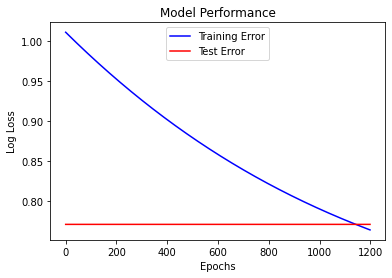

'Final Training Error: 0.76, Final Test Error: 0.77'

In [75]:
scratch_lr.plot_loss()

In [76]:
scratch_lr.confusion_matrix(X_test, y_test)

,Index,,Actual
0,Predicted,True,False
1,True,10,15
2,False,7,11


In [77]:
scratch_lr.feature_names_in_

['danceability',
 'instrumentalness',
 'total_words',
 'mode',
 'key_6',
 'key_9',
 'key_10',
 'key_11']

In [78]:
feature_weights = DataFrame({'feature' : features.columns, 'abs_weight' : abs(scratch_lr.weights)})
feature_weights.sort_values(by='abs_weight', ascending=True, inplace=True)
feature_weights

,feature,abs_weight
3,mode,0.229493
0,danceability,0.360569
6,key_10,0.403737
4,key_6,0.433671
2,total_words,0.482534
5,key_9,0.623638
1,instrumentalness,0.721409
7,key_11,0.810593


### Comparison Model Building and Evaluation
Manually optimized Random Forest and KNN

In [79]:
models = ['LR', 'SVC', 'LinearSVC', 'Naive Bayes', 'Random Forest', 'KNN', 'Optimized LR']

In [80]:
models = [LogisticRegression(C=10, max_iter=10000, penalty='l2'),
		 SVC(C=100, max_iter=20000, random_state=0),
		 LinearSVC(C=0.1, max_iter=20000, random_state=0),
		 GaussianNB(var_smoothing=2.848035868435799e-07),
		 RandomForestClassifier(max_depth=10, bootstrap=True, min_samples_split=2, random_state=0),
		 KNeighborsClassifier(),
		 LogisticRegression(C=200.0, max_iter=10000, penalty='l1',
						random_state=0, solver='liblinear')
]

In [81]:
acc, f1, precision, recall = [], [], [], []

In [82]:
for model in models:
	model = model.fit(X_train, y_train)
	preds = model.predict(X_test)
	
	acc_temp, f1_temp, precision_temp, recall_temp = \
	accuracy_score(preds, y_test), f1_score(preds, y_test), \
	precision_score(preds, y_test), recall_score(preds, y_test)
	
	acc.append(acc_temp)
	f1.append(f1_temp)
	precision.append(precision_temp)
	recall.append(recall_temp)
	
print('All models scored')

All models scored


### Model Metrics

In [83]:
model_results = DataFrame({'model': models, 'accuracy': acc,
							'f1': f1, 'precision': precision, 'recall': recall})

In [84]:
model_results

,model,accuracy,f1,precision,recall
0,"LogisticRegression(C=10, max_iter=10000)",0.651163,0.400000,0.294118,0.625000
1,"SVC(C=100, max_iter=20000, random_state=0)",0.627907,0.529412,0.529412,0.529412
2,"LinearSVC(C=0.1, max_iter=20000, random_state=0)",0.674419,0.363636,0.235294,0.800000
3,GaussianNB(var_smoothing=2.848035868435799e-07),0.697674,0.606061,0.588235,0.625000
4,"(DecisionTreeClassifier(max_depth=10, max_feat...",0.790698,0.709677,0.647059,0.785714
5,KNeighborsClassifier(),0.651163,0.444444,0.352941,0.600000
6,"LogisticRegression(C=200.0, max_iter=10000, pe...",0.767442,0.642857,0.529412,0.818182
